In [3]:
# Import relevant packages
import nasdaqdatalink
import os
from dotenv import load_dotenv
import pandas as pd

In [4]:
# get a previously issued Nasdaq API key from an .env file
# *Pedro's key name is 'nasdaqAPIKey'.  Key name varies by user
env_file = 'env_vars.env'
load_dotenv(env_file)
nasdaq_key = os.getenv('nasdaqAPIKey')
print(nasdaq_key)

None


In [4]:
# Configure NASDAQ API key
nasdaqdatalink.ApiConfig.api_key = nasdaq_key

In [5]:
# USA CPI Data
USdata = nasdaqdatalink.get('RATEINF/CPI_USA', start_date='2022-01-31', end_date='2023-01-31')

print(type(USdata))
# Assign Column Name
USdata.columns = ['U.S.A.']

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Japan CPI Data
Jdata = nasdaqdatalink.get('RATEINF/CPI_JPN', start_date='2022-01-31', end_date='2023-01-31')

# Assign Column Name
Jdata.columns = ['Japan']

In [7]:
# France CPI Data
FRdata = nasdaqdatalink.get('RATEINF/CPI_FRA', start_date='2022-01-31', end_date='2023-01-31')

# Assign Column Name
FRdata.columns = ['France']

In [8]:
# Consolidate US, Japan, France Data
dfCPI = pd.merge(pd.merge(USdata,Jdata,on='Date'),FRdata,on='Date')
dfCPI

,U.S.A.,Japan,France
Date,,,
2022-01-31,281.148,100.3,108.12
2022-02-28,283.716,100.7,108.94
2022-03-31,287.504,101.1,110.49
2022-04-30,289.109,101.5,110.97
2022-05-31,292.296,101.8,111.72
2022-06-30,296.311,101.8,112.55
2022-07-31,296.276,102.3,112.87
2022-08-31,296.171,102.7,113.38
2022-09-30,296.808,103.1,112.74


<AxesSubplot:title={'center':'Consumer Price Index 2022'}, xlabel='Date', ylabel='CPI'>

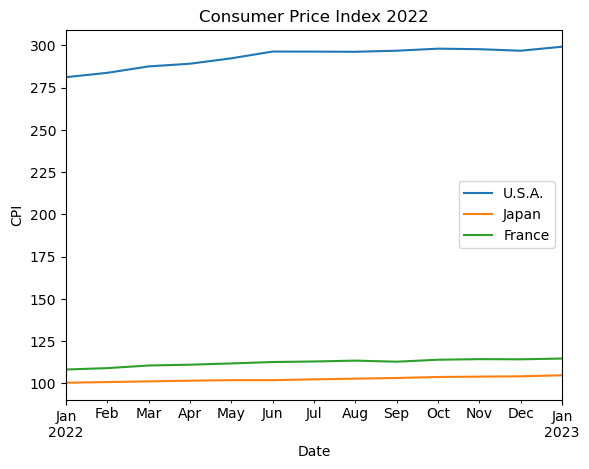

In [9]:
# Plot consolidated dataframe 
%matplotlib inline
dfCPI.plot.line(subplots=False, ylabel = "CPI",title = "Consumer Price Index 2022")
